<a href="https://colab.research.google.com/github/dipteshh/ml-learn/blob/main/stock_price%20_prediction_ml_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv('kotak10yrs.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-11-17,2070.000000,2081.850098,2045.500000,2053.100098,2051.864746,1446763
1,2021-11-18,2050.000000,2062.449951,2008.900024,2024.449951,2023.231934,2793199
2,2021-11-22,2044.000000,2044.000000,1941.000000,1955.449951,1954.273438,2748329
3,2021-11-23,1938.000000,1993.150024,1932.699951,1982.900024,1981.707031,3229625
4,2021-11-24,1979.550049,2024.949951,1970.000000,2011.400024,2010.189819,1947483


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       249 non-null    object 
 1   Open       249 non-null    float64
 2   High       249 non-null    float64
 3   Low        249 non-null    float64
 4   Close      249 non-null    float64
 5   Adj Close  249 non-null    float64
 6   Volume     249 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.7+ KB


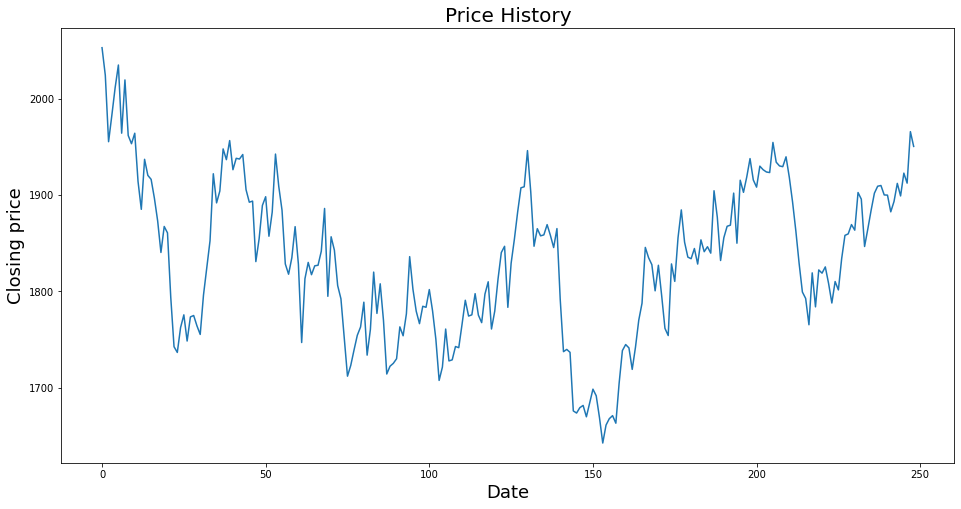

In [6]:
plt.figure(figsize=(16,8))
plt.title('Price History',fontsize=20)
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Closing price',fontsize=18)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcdbf1695d0>,
      dtype=object)

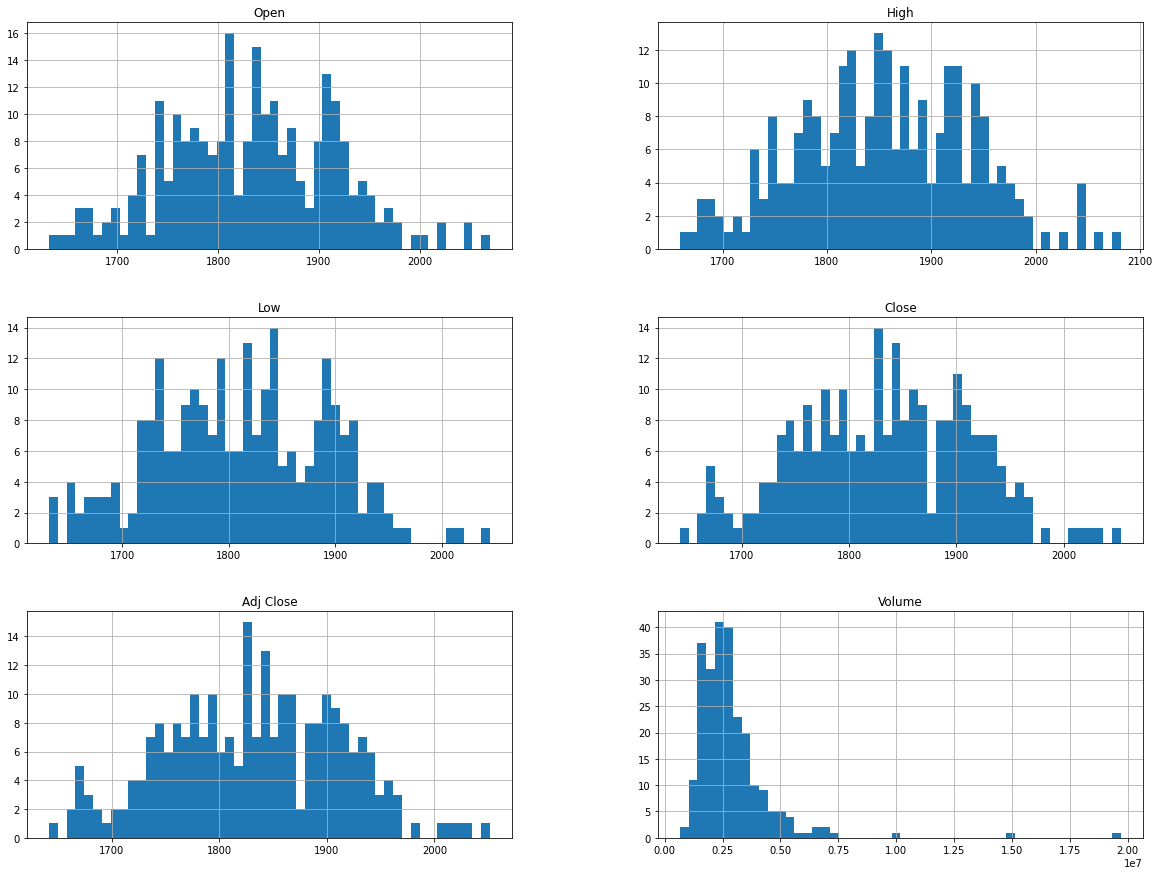

In [7]:
df.hist(bins = 50, figsize=(20,15))

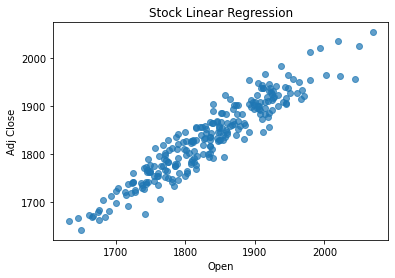

In [8]:
plt.scatter(df['Open'],df['Close'],alpha=0.7)
plt.xlabel('Open')
plt.ylabel('Adj Close')
plt.title('Stock Linear Regression')
plt.show()

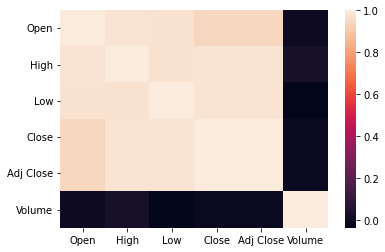

In [9]:
import seaborn as sns
sns.heatmap(df.corr())

In [10]:
del df['Adj Close']
del df['Volume']
del df['Date']

In [11]:
df.dropna()
df = df[np.isfinite(df).all(1)]
df.head()

,Open,High,Low,Close
0,2070.000000,2081.850098,2045.500000,2053.100098
1,2050.000000,2062.449951,2008.900024,2024.449951
2,2044.000000,2044.000000,1941.000000,1955.449951
3,1938.000000,1993.150024,1932.699951,1982.900024
4,1979.550049,2024.949951,1970.000000,2011.400024


In [12]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1:]

In [13]:
x.head()

,Open,High,Low
0,2070.000000,2081.850098,2045.500000
1,2050.000000,2062.449951,2008.900024
2,2044.000000,2044.000000,1941.000000
3,1938.000000,1993.150024,1932.699951
4,1979.550049,2024.949951,1970.000000


In [14]:
y.head()

,Close
0,2053.100098
1,2024.449951
2,1955.449951
3,1982.900024
4,2011.400024


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=15)

# Using Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lreg = LinearRegression()

lreg.fit(x_train,y_train)

LinearRegression()

In [17]:
y_pred1 = lreg.predict(x_test)
y_pred1

array([[1927.65523786],
       [1908.90446862],
       [1805.14305784],
       [1867.99796264],
       [1672.56617931],
       [1835.71551837],
       [1909.71757081],
       [1702.65575124],
       [1678.6224164 ],
       [1920.00927671],
       [1782.63459457],
       [1775.63752174],
       [1797.66718296],
       [1820.34940797],
       [1850.95635289],
       [1843.44960643],
       [1741.06285455],
       [1861.82021543],
       [1848.16491801],
       [1850.54687319],
       [1743.32138385],
       [1928.5585701 ],
       [1915.71078145],
       [1784.48293613],
       [1886.65597978],
       [1799.90799323],
       [1929.49921831],
       [1734.99140402],
       [1694.0038964 ],
       [1757.74421893],
       [1823.44092461],
       [1858.3394832 ],
       [1898.76764138],
       [1922.85883431],
       [1789.21773896],
       [1802.93871818],
       [1832.25588253],
       [1651.14786928],
       [1839.97725045],
       [1833.29333433],
       [1846.91124171],
       [1895.094

In [18]:
lr_score = lreg.score(x_test,y_test)
lr_score

0.9789396825087286

In [19]:
lreg.intercept_

array([37.87570174])

In [20]:
lreg.coef_

array([[-0.54694125,  0.70223826,  0.82528695]])

In [21]:
y_pred1 = lreg.predict(x)

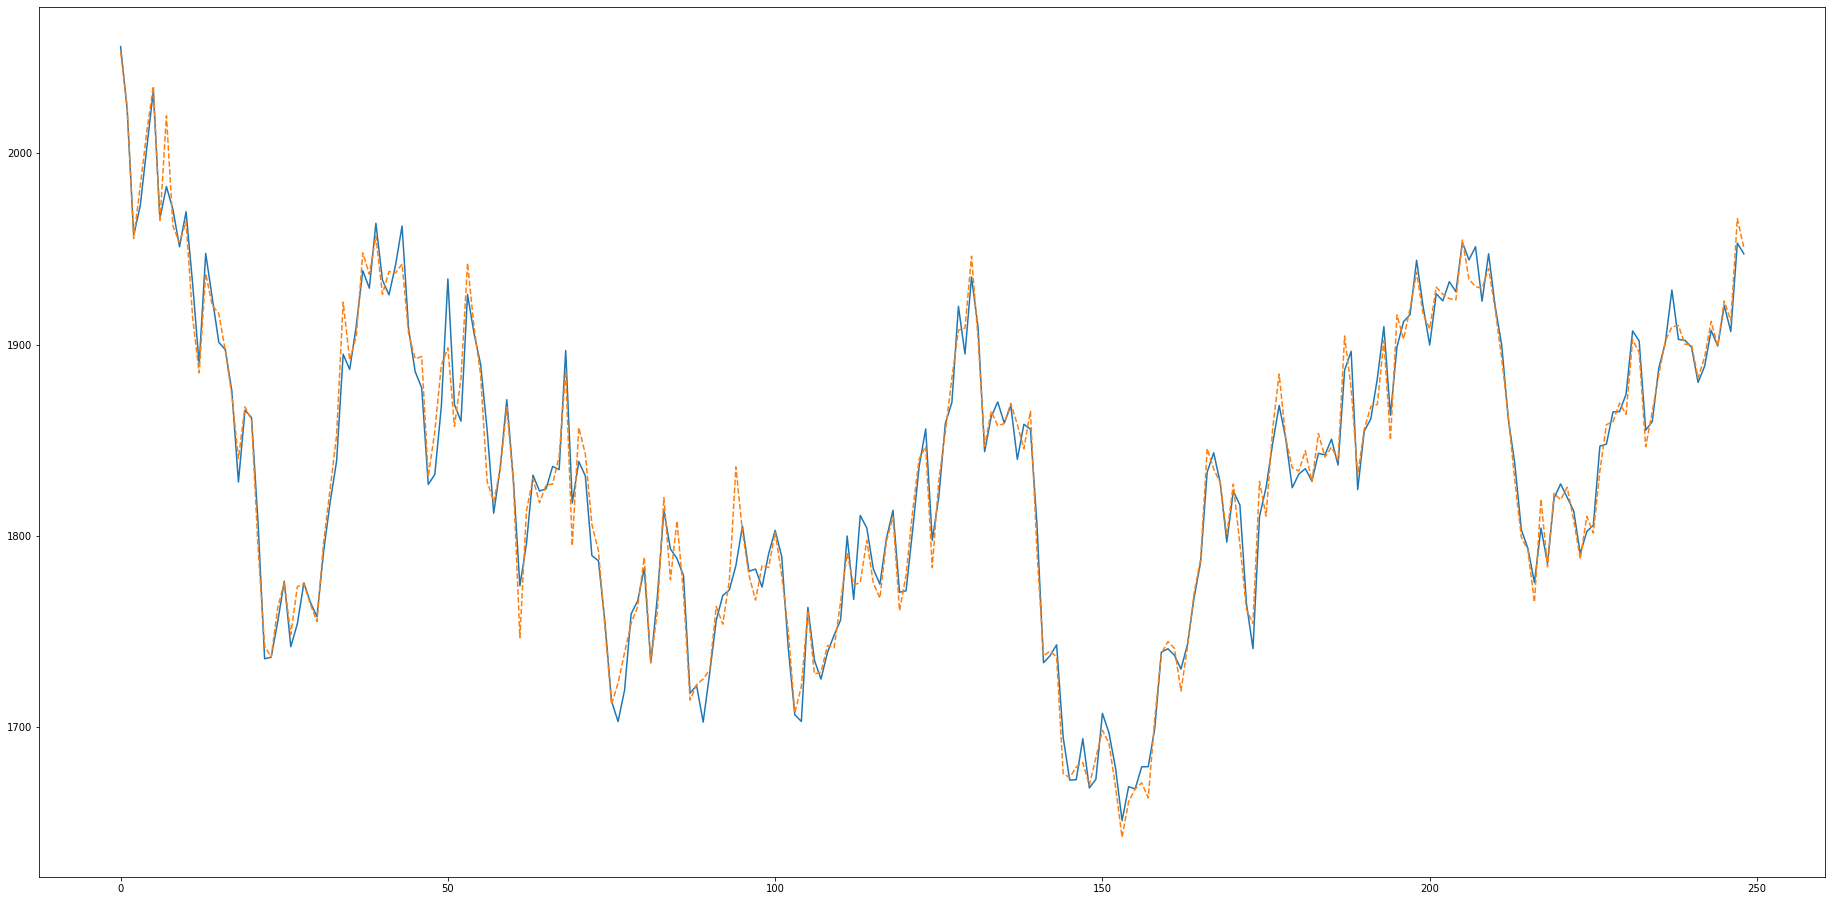

In [22]:
plt.figure(figsize=(32,16))
plt.plot(y_pred1)
plt.plot(df['Close'],linestyle='dashed')
plt.show()

#Using Random Forest Regression

In [23]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor(n_estimators=100,random_state=15)
rfreg.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(random_state=15)

In [24]:
y_pred2 = rfreg.predict(x_test)
y_pred2

array([1925.8620044 , 1918.18749866, 1814.22053964, 1863.48299331,
       1666.17352548, 1833.4515028 , 1905.23050058, 1720.87800897,
       1667.74703856, 1931.88547963, 1785.04647945, 1786.5984961 ,
       1799.47149671, 1822.12501591, 1859.02650752, 1845.17548827,
       1745.99600703, 1873.74899667, 1846.59299914, 1852.7845228 ,
       1741.76249635, 1926.1615174 , 1924.3900196 , 1768.37398343,
       1886.95999763, 1792.1045006 , 1932.27547611, 1739.68948721,
       1694.49952997, 1760.67299453, 1824.91202392, 1860.32850462,
       1887.03899911, 1930.60296993, 1794.00599495, 1790.50948752,
       1830.7364906 , 1667.87148325, 1850.96800539, 1829.84099386,
       1849.56400631, 1900.7814893 , 1854.20948739, 2016.49947884,
       1864.77649663, 1824.50502418, 1893.02997831, 2018.13248056,
       1944.02198474, 1992.6385057 , 1794.28449106, 1718.88748646,
       1749.86451268, 1960.22999507, 1850.63300543, 1666.30552502,
       1882.55549448, 1814.37800054, 1816.49202409, 1678.32403

In [25]:
rfr_score = rfreg.score(x_test,y_test)
rfr_score

0.9421018025866028

In [26]:
y_pred2 = rfreg.predict(x)